<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#How-to-Choose-the-Number-of-Clusters" data-toc-modified-id="How-to-Choose-the-Number-of-Clusters-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>How to Choose the Number of Clusters</a></span><ul class="toc-item"><li><span><a href="#Import-the-relevant-libraries" data-toc-modified-id="Import-the-relevant-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import the relevant libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Plot-the-data" data-toc-modified-id="Plot-the-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot the data</a></span></li><li><span><a href="#Select-the-features" data-toc-modified-id="Select-the-features-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Select the features</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#Clustering-results" data-toc-modified-id="Clustering-results-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Clustering results</a></span></li></ul></li><li><span><a href="#Plot-the-data" data-toc-modified-id="Plot-the-data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Plot the data</a></span></li><li><span><a href="#Selecting-the-number-of-clusters" data-toc-modified-id="Selecting-the-number-of-clusters-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Selecting the number of clusters</a></span><ul class="toc-item"><li><span><a href="#WCSS" data-toc-modified-id="WCSS-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>WCSS</a></span></li><li><span><a href="#The-Elbow-Method" data-toc-modified-id="The-Elbow-Method-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>The Elbow Method</a></span></li></ul></li><li><span><a href="#n_cluster-=-2" data-toc-modified-id="n_cluster-=-2-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>n_cluster = 2</a></span></li></ul></li></ul></div>

# How to Choose the Number of Clusters

Using the same code as in the previous exercise, find the WCSS for clustering solutions with 1 to 10 clusters (you can try with more if you wish).

Find the most suitable solutions, run them and compare the results.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import sklearn

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
sns.set()

# seaborn warnings ignore
import warnings
warnings.filterwarnings('ignore')

# Jupyter notebook settings for pandas
pd.set_option('display.float_format', '{:,.2f}'.format) # numbers sep by comma
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 100)


# ipython
from IPython.display import Image

In [2]:
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries_exercise.csv'</i>.

In [3]:
!ls ../data/csv

Bank-data-testing.csv                Countries-exercise.csv               real_estate_price_size_year.csv
Bank-data.csv                        Example-bank-data.csv                real_estate_price_size_year_view.csv
Categorical.csv                      real_estate_price_size.csv


Remove the duplicate index column from the dataset. 

In [4]:
df = pd.read_csv('../data/csv/Countries-exercise.csv')
print(df.shape)
df.head()

(241, 3)


,name,Longitude,Latitude
0,Aruba,-69.98,12.52
1,Afghanistan,66.00,33.84
2,Angola,17.54,-12.29
3,Anguilla,-63.06,18.22
4,Albania,20.05,41.14


Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

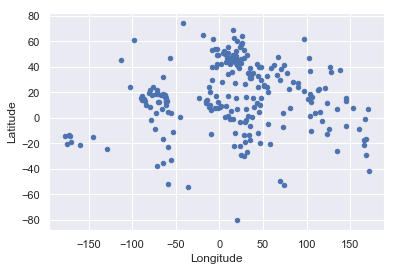

In [5]:
df.plot(kind='scatter',x='Longitude',y='Latitude',c='b');

## Select the features

Make sure to select the appropriate features since we are no longer using the categorical variable for our clustering but rather <i>'Longitude'</i> and <i>'Laditude'</i>.

In [6]:
x = df.iloc[:,1:3].copy()
x.head()

,Longitude,Latitude
0,-69.98,12.52
1,66.00,33.84
2,17.54,-12.29
3,-63.06,18.22
4,20.05,41.14


## Clustering

Use 4 clusters initially.

In [7]:
kmeans = KMeans(n_clusters=4,random_state=100)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

### Clustering results

In [8]:
pred = kmeans.fit_predict(x)
pred[0:5]

array([2, 0, 0, 2, 1], dtype=int32)

In [9]:
df['Cluster'] = pred
df.head()

,name,Longitude,Latitude,Cluster
0,Aruba,-69.98,12.52,2
1,Afghanistan,66.00,33.84,0
2,Angola,17.54,-12.29,0
3,Anguilla,-63.06,18.22,2
4,Albania,20.05,41.14,1


Plot the data once again but separate the data by the clusters we defined.  

## Plot the data

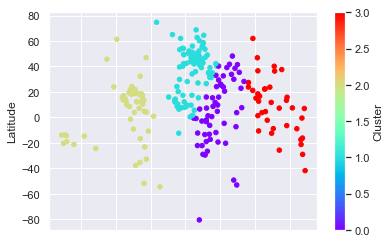

In [10]:
df.plot(kind='scatter',x='Longitude',y='Latitude',c='Cluster',cmap='rainbow')

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [11]:
kmeans.inertia_

256590.585754061

Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish).

In [12]:
max_ncluster = 11
wcss = [KMeans(i).fit(x).inertia_ for i in range(1,max_ncluster)]
wcss

[1413859.6798344273,
 657012.0797586325,
 325254.4812033131,
 256590.585754061,
 192212.48189497043,
 151883.98694078988,
 126758.3541417987,
 103083.28273734644,
 84968.82778683936,
 76687.82426207987]

### The Elbow Method

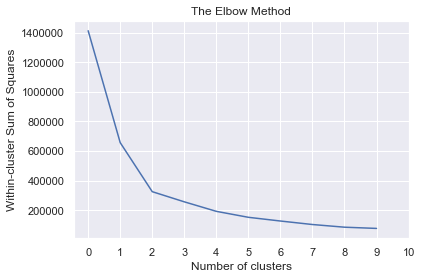

In [13]:
plt.plot(wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.xticks(range(11));

Based on the Elbow Curve, plot several graphs with the appropriate amounts of clusters you believe would best fit the data.

Compare the scatter plots to determine which one to use in our further analysis. 

<i>Hint: we already created the scatter plot for 4 clusters, so we only have to slightly alter our code.</i>

## n_cluster = 2

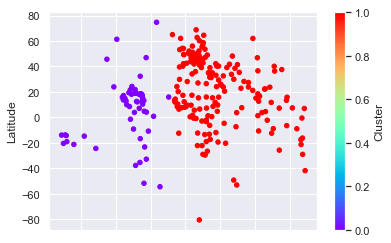

In [14]:
kmeans = KMeans(n_clusters=2,random_state=100)
kmeans.fit(x)
pred = kmeans.fit_predict(x)

df['Cluster'] = pred
df.plot(kind='scatter',x='Longitude',y='Latitude',c='Cluster',cmap='rainbow')

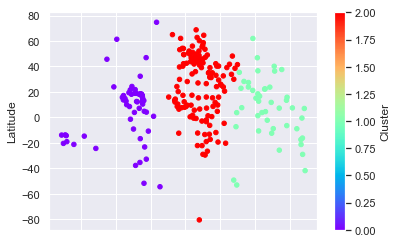

In [15]:
kmeans = KMeans(n_clusters=3,random_state=100)
kmeans.fit(x)
pred = kmeans.fit_predict(x)

df['Cluster'] = pred
df.plot(kind='scatter',x='Longitude',y='Latitude',c='Cluster',cmap='rainbow')